In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
import zipfile
import os
import seaborn as sns

%matplotlib inline

In [2]:
zf = zipfile.ZipFile('competitive-data-science-predict-future-sales.zip')

In [3]:

# Read items
items = pd.read_csv(zf.open('items.csv'))

# Read sales train
sales_train = pd.read_csv(zf.open('sales_train.csv'))


# Read item categories
item_categories = pd.read_csv(zf.open('item_categories.csv'))

# Read shops
shops = pd.read_csv(zf.open('shops.csv'))

# Read test
test = pd.read_csv(zf.open('test.csv'))

In [6]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [7]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [9]:
sales_train['date'][0].year

2013

In [12]:
#combine all required dataets to create our training set

train = sales_train.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)

In [14]:
train.shape

(2935849, 10)

In [15]:
#exploiting the data leakage, 
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()
# Only shops that exist in test set.
lk_train = train[train['shop_id'].isin(test_shop_ids)]
# Only items that exist in test set.
lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]


In [24]:
print('Data set size before leaking:', train.shape[0])
print('Data set size after leaking:', lk_train.shape[0],'\nPercent Data Reduction:', round(100*lk_train.shape[0]/train.shape[0],2), '%')

Data set size before leaking: 2935849
Data set size after leaking: 1224439 
Percent Data reduction: 41.71 %


In [25]:
lk_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
10,2013-01-03,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
11,2013-01-05,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
12,2013-01-07,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
13,2013-01-08,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [26]:
# Select only useful features.removing text features
train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [ ]:
# Group by month in this case "date_block_num" and aggregate features.


In [55]:
train_monthly_draft = train_monthly.sort_values('date').groupby(['shop_id'], as_index = False)

In [56]:
train_monthly_draft.head()

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
112089,2013-01-01,0,42,55,2090,449.0,1.0
108984,2013-01-01,0,46,40,14390,149.0,1.0
108985,2013-01-01,0,46,40,14389,149.0,1.0
18128,2013-01-01,0,28,19,4906,1799.0,1.0
21124,2013-01-01,0,28,65,16135,249.0,1.0
...,...,...,...,...,...,...,...
2894886,2015-10-18,33,36,40,17374,149.0,1.0
2894882,2015-10-18,33,36,63,15287,1099.0,1.0
2894873,2015-10-18,33,36,40,14801,449.0,1.0
2894850,2015-10-18,33,36,40,15798,399.0,1.0


In [62]:
train_monthly_draft = train_monthly.sort_values('date').groupby(['date_block_num','shop_id'], as_index = False)

In [63]:
train_monthly_draft.head()

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
112089,2013-01-01,0,42,55,2090,449.0,1.0
108984,2013-01-01,0,46,40,14390,149.0,1.0
108985,2013-01-01,0,46,40,14389,149.0,1.0
18128,2013-01-01,0,28,19,4906,1799.0,1.0
21124,2013-01-01,0,28,65,16135,249.0,1.0
...,...,...,...,...,...,...,...
2894886,2015-10-18,33,36,40,17374,149.0,1.0
2894882,2015-10-18,33,36,63,15287,1099.0,1.0
2894873,2015-10-18,33,36,40,14801,449.0,1.0
2894850,2015-10-18,33,36,40,15798,399.0,1.0


In [64]:
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)

In [66]:
train_monthly.head()

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
112089,2013-01-01,0,42,55,2090,449.0,1.0
108984,2013-01-01,0,46,40,14390,149.0,1.0
108985,2013-01-01,0,46,40,14389,149.0,1.0
18128,2013-01-01,0,28,19,4906,1799.0,1.0
21124,2013-01-01,0,28,65,16135,249.0,1.0
...,...,...,...,...,...,...,...
2915929,2015-10-31,33,6,24,7136,3599.0,1.0
2933031,2015-10-31,33,25,40,12088,399.0,1.0
2930135,2015-10-31,33,24,55,7462,349.0,1.0
2893277,2015-10-31,33,38,67,19291,999.0,1.0


In [68]:
type(train_monthly)

pandas.core.groupby.generic.DataFrameGroupBy

In [75]:
print(14//12)
print(14%12)
print(14/12)

1
2
1.1666666666666667


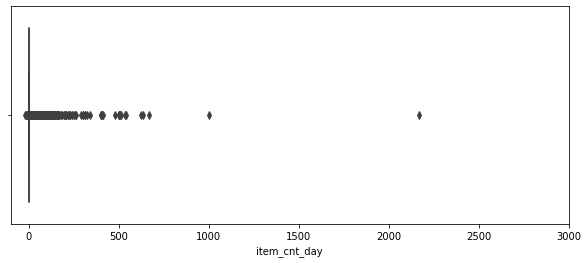

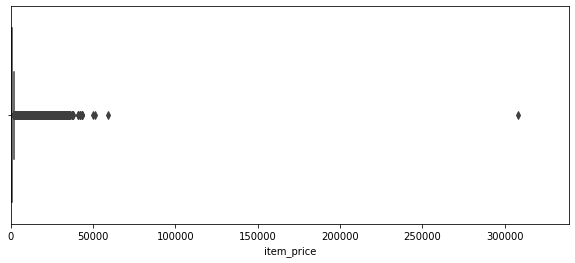

In [79]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)